In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load covid 19 dataset from Kaggle

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv

In [2]:
df = pd.read_csv('db/covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,03/04/2020,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,03/04/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,03/04/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,03/04/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [4]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3390,3391,2020-03-04,NaN,Ukraine,2020-03-03T15:33:02,1.0,0.0,0.0
3391,3392,2020-03-04,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
3392,3393,2020-03-04,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
3393,3394,2020-03-04,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


# Covid-19 cases by country

In [3]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending = False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Morocco               1.0
Nepal                 1.0
Nigeria               1.0
Latvia                1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

Mainland China is the country with the highest number of confirmed covid-19 cases in the data set

# Working with Mainland China

In [5]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [10]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key = 'ObservationDate', freq = '1D')])[['Confirmed', 'Deaths', 'Recovered']].sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [11]:
df_china = df_time.loc['Mainland China', :]
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


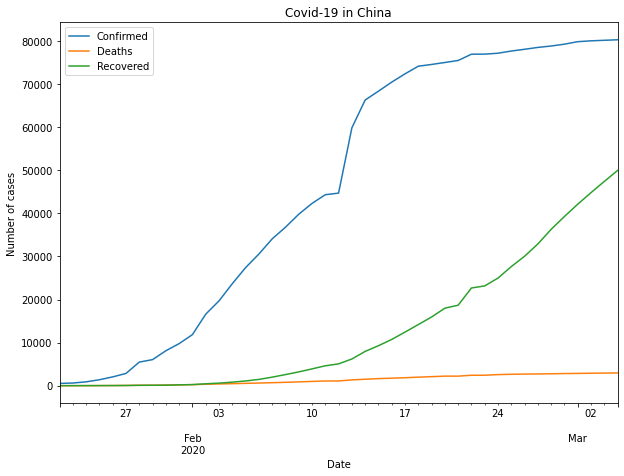

In [13]:
df_china.plot(figsize = (10, 7), title = 'Covid-19 in China')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.show()

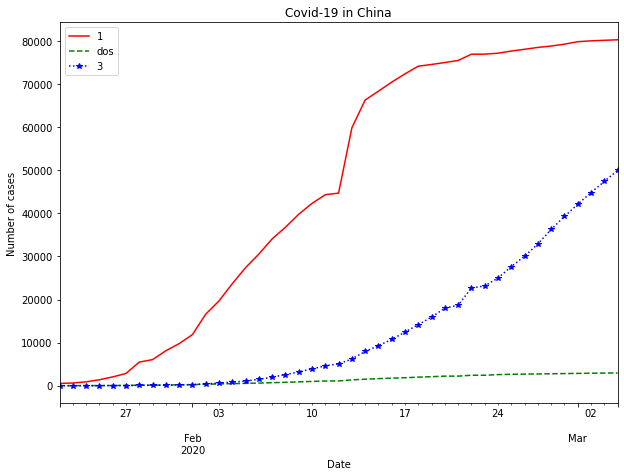

In [18]:
ax = df_china.plot(figsize = (10, 7), title = 'Covid-19 in China',
            legend = False, style = ['r-', 'g--', 'b:*'])
ax.legend(['1', 'dos', '3'])
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.show()

## Month cases

In [19]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


<AxesSubplot:xlabel='ObservationDate'>

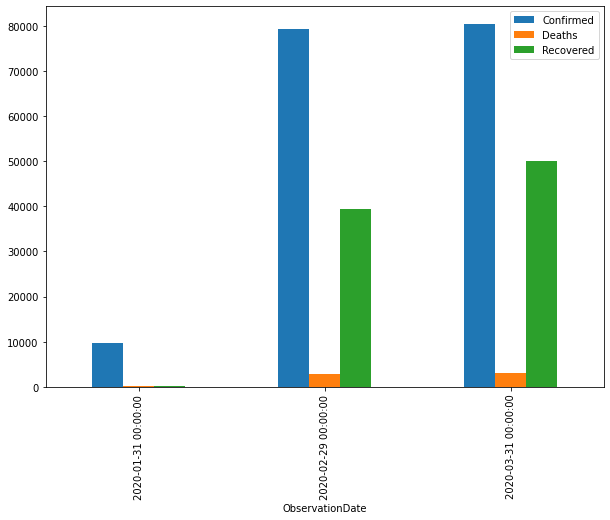

In [21]:
df_monthly.plot(kind = 'bar', figsize = (10, 7))

<AxesSubplot:xlabel='ObservationDate'>

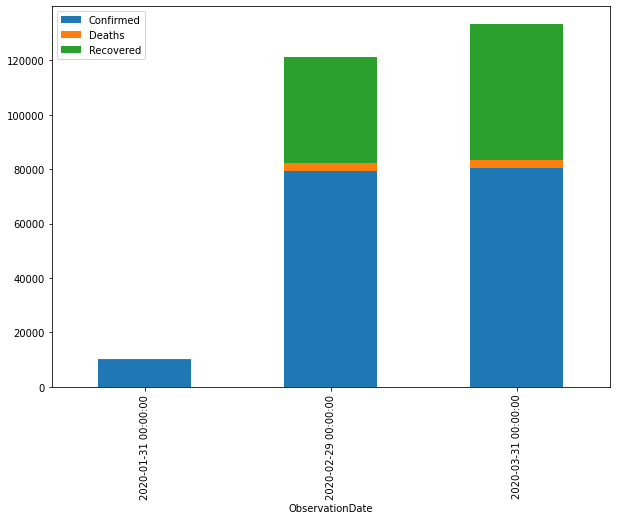

In [22]:
df_monthly.plot(kind = 'bar', figsize = (10, 7), stacked = True)

In [23]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


/mnt/c/Users/j_cam/Documents/Proyectos/usingPandas/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>], dtype=object)

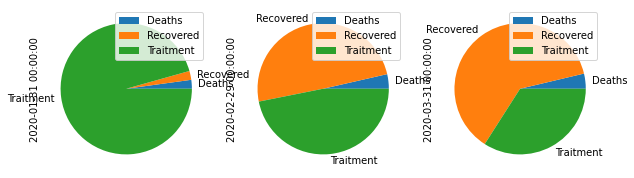

In [28]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(kind = 'pie', figsize = (10, 7), subplots = True)

In [31]:
df_china['rate'] = 1 - df_china['Deaths'] / df_china['Confirmed']
df_china

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22,547.0,17.0,28.0,0.968921
2020-01-23,639.0,18.0,30.0,0.971831
2020-01-24,916.0,26.0,36.0,0.971616
2020-01-25,1399.0,42.0,39.0,0.969979
2020-01-26,2062.0,56.0,49.0,0.972842
2020-01-27,2863.0,82.0,58.0,0.971359
2020-01-28,5494.0,131.0,101.0,0.976156
2020-01-29,6070.0,133.0,120.0,0.978089
2020-01-30,8124.0,171.0,135.0,0.978951


<AxesSubplot:>

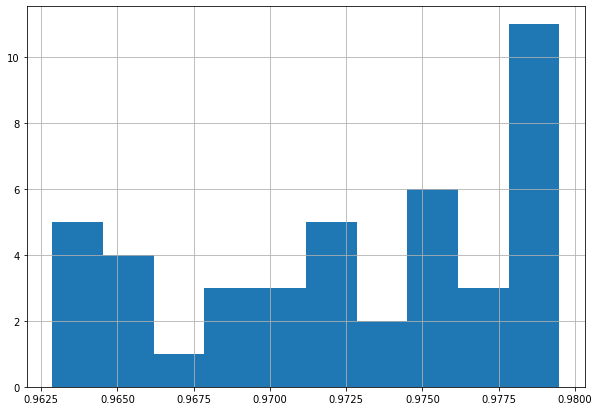

In [32]:
df_china['rate'].hist(figsize = (10, 7), bins = 10)

<AxesSubplot:ylabel='Density'>

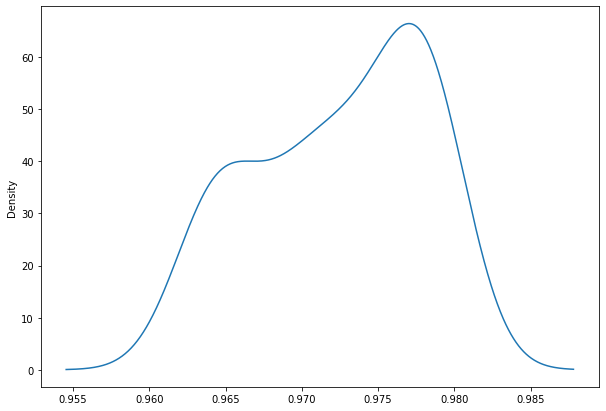

In [36]:
df_china['rate'].plot(kind = 'kde', figsize = (10, 7))